In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import avar
%matplotlib notebook

path = os.getcwd() + "\\apple_watch_data"
csv_files = glob.glob(os.path.join(path, "*.dat"))
data = pd.read_csv(csv_files[14], names=['time','x','y','z'], delim_whitespace=True)
# data = pd.read_csv('apple_watch_data/1444079161.m_watch_acc.dat', names=['time','x','y','z'], delim_whitespace=True)
print(data)

        time      x      y       z
0      122.0    8.0  -32.0 -1040.0
1      162.0    8.0  -24.0 -1032.0
2      202.0   40.0  -40.0 -1056.0
3      242.0    8.0  -40.0 -1024.0
4      282.0    0.0  -32.0 -1032.0
..       ...    ...    ...     ...
495  19759.0 -120.0 -232.0  -992.0
496  19799.0 -128.0 -240.0  -912.0
497  19839.0 -128.0 -240.0 -1008.0
498  19879.0 -128.0 -248.0  -952.0
499  19919.0 -128.0 -256.0  -992.0

[500 rows x 4 columns]


# Allan Variance Analysis

<IPython.core.display.Javascript object>


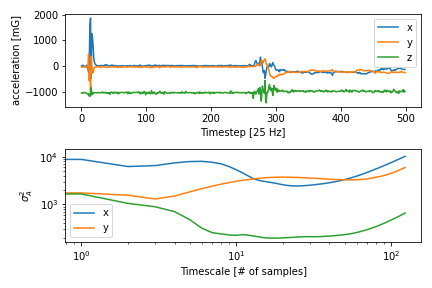

In [16]:
fig = plt.figure()
fig.set_size_inches(6, 4)
ax = fig.add_subplot(2, 1, 1)

ax.plot(data['x'])
ax.plot(data['y'])
plt.plot(data['z'])
ax.set_xlabel('Timestep [25 Hz]')
ax.set_ylabel('acceleration [mG]')
ax.legend(['x','y','z'])


ct = avar.CharacteristicScale()

ax = fig.add_subplot(2, 1, 2)
ax.plot(ct.allanvar(data['x']))
ax.plot(ct.allanvar(data['y']))
plt.plot(ct.allanvar(data['z']))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Timescale [# of samples]')
ax.set_ylabel('$\sigma_A^2$')
ax.legend(['x','y'])
fig.tight_layout()

# Dynamic Allan Variance Analysis

<IPython.core.display.Javascript object>


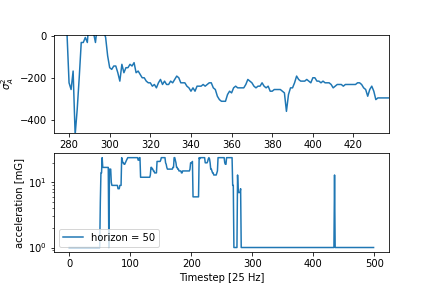

In [21]:
from scipy.ndimage import gaussian_filter1d

fig, axs = plt.subplots(2)
horizons = [50, 100, 200]
horizons = [50]
for h in horizons:
    char = avar.CharacteristicScale(horizon=h)
    
    M_c = []
    for day, v in enumerate(data['x']):
        char.memory.append(v)
        if day > h:
            davar = char.dynallanvar()
            davar = gaussian_filter1d(davar, 2)
            m_c = char.find_charecteristic_scale(davar)
            M_c.append(m_c)
        else:
            M_c.append(1)
    axs[1].plot(M_c, label='horizon = '+str(h))
    axs[1].set_xlabel('Timestep [25 Hz]')
    axs[1].set_ylabel('acceleration [mG]')
    axs[1].set_yscale("log")
    axs[1].legend()
axs[0].plot(data['x'])
axs[0].set_xlabel('Timescale [# of samples]')
axs[0].set_ylabel('$\sigma_A^2$')
plt.show()